#### Program UAS FINAL Pemodelan dan Simulasi

Dibuat oleh:

NIM: 10116490

Nama: Muhammad Fajar Maulana

Kelas: MOSI_IF-3

Hal pertama yang dilakukan adalah dengan menyiapkan atau mengimport library yang diperlukan seperti numpy dan pandas. dengan memanggil library yang sudah diinstall pada paket python anaconda.


In [1]:
# AUTHOR: muhammadfajarm@gmail.com
# Mengimport library yang mendasar yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn import preprocessing
from sklearn import datasets
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import seaborn as sns
%matplotlib inline


In [2]:
# Mengimport library yang diperlukan untuk Pengklasifikasian menggunakan machine learning

# Boosting
# 1.Ensemble Boosting Ada Boost
from sklearn.ensemble import AdaBoostClassifier

# 2.Logistic Regression
from sklearn.linear_model import LogisticRegression

# 3.Support Vector Machine
from sklearn.svm import SVC

# 4.Artificial Neural Network
from sklearn.neural_network import MLPClassifier

In [3]:
# Import Datasets 1: BUS1216 (Bank Umum Syariah 2012-2016)
df1216 = pd.read_csv('datasets/bankumumsyariah1216.csv')

# Memilih fitur yang akan digunakan dimana X adalah nilai dari kolom X1 sampai Z-Score , 
# dan Y adalah data target dari class.
feature_cols = ['X1','X2','X3','X4','Z-Score']
X = df1216[feature_cols]
y = df1216.Class
#Menampilkan datasets
df1216.head(10)

,X1,X2,X3,X4,Z-Score,Class
0,0.8856,0.0166,0.0219,0.2726,6.2967,2
1,0.8888,0.0064,0.0072,0.1418,6.0484,2
2,0.8441,0.0156,0.0157,0.1915,5.8949,2
3,0.8660,0.0211,0.0109,0.1651,5.9962,2
4,0.8486,0.0194,0.0031,0.1310,5.7887,2
5,0.7731,0.0118,0.0069,0.0901,5.2514,2
6,0.8109,0.0155,0.0081,0.0898,5.5190,2
7,0.8197,0.0149,0.0059,0.0960,5.5658,2
8,0.8481,0.0156,0.0073,0.1085,5.7775,2
9,0.8341,0.0210,0.0097,0.1093,5.7199,2


In [4]:
# Membagi dataset kedalam training set dan test set
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.50, random_state=47)

In [5]:
#Menjalankan based learn Logistic Regression
logregclf1216 = LogisticRegression()
logregclf1216.fit(X_train, y_train)
logregclf1216_y_pred = logregclf1216.predict(X_test)

# Menscore hasil dari Logistic Regression
logregclf1216.score(X_train, y_train), logregclf1216.score(X_test, y_test)

(1.0, 1.0)

In [6]:
# Menampilkan akurasi dan confusion matrix dari Logistic Regression
conf_matrix_logregclf1216 = confusion_matrix(y_test, logregclf1216_y_pred)
logregclf1216_accuracy = accuracy_score(y_test, logregclf1216_y_pred)
print(conf_matrix_logregclf1216, "Accuracy: " , logregclf1216_accuracy*100)

[[28]] Accuracy:  100.0


In [7]:
print(classification_report(y_test,logregclf1216_y_pred))

              precision    recall  f1-score   support

           2       1.00      1.00      1.00        28

    accuracy                           1.00        28
   macro avg       1.00      1.00      1.00        28
weighted avg       1.00      1.00      1.00        28



In [8]:
#Menjalankan based Learn Support Vector Machine
svmclf1216 = SVC(gamma="auto", random_state=42)
svmclf1216.fit(X_train, y_train)
svmclf1216_y_pred = svmclf1216.predict(X_test)

In [9]:
# Menscore hasil dari Support Vector Machine
svmclf1216.score(X_train, y_train), svmclf1216.score(X_test, y_test)

(1.0, 1.0)

In [10]:
# Menampilkan akurasi dan confusion matrix dari Support Vector Machine
conf_matrix_svmclf1216 = confusion_matrix(y_test, svmclf1216_y_pred)
svmclf1216_accuracy = accuracy_score(y_test, svmclf1216_y_pred)
print(conf_matrix_svmclf1216, "Accuracy: " , svmclf1216_accuracy*100)

[[28]] Accuracy:  100.0


In [11]:
print(classification_report(y_test,svmclf1216_y_pred))

              precision    recall  f1-score   support

           2       1.00      1.00      1.00        28

    accuracy                           1.00        28
   macro avg       1.00      1.00      1.00        28
weighted avg       1.00      1.00      1.00        28



In [12]:
#Menjalankan based learn Artificial Neural Network
annclf1216 = MLPClassifier(hidden_layer_sizes=(6, 3), max_iter=300)
annclf1216.fit(X_train, y_train)
annclf1216_y_pred = annclf1216.predict(X_test)

In [13]:
# Menscore hasil dari Support Vector Machine
annclf1216.score(X_train, y_train), annclf1216.score(X_test, y_test)

(1.0, 1.0)

In [14]:
# Menampilkan akurasi dan confusion matrix dari Support Vector Machine
conf_matrix_annclf1216 = confusion_matrix(y_test, annclf1216_y_pred)
annclf1216_accuracy = accuracy_score(y_test, annclf1216_y_pred)
print(conf_matrix_annclf1216, "Accuracy: " , annclf1216_accuracy*100)

[[28]] Accuracy:  100.0


In [15]:
print(classification_report(y_test, annclf1216_y_pred))

              precision    recall  f1-score   support

           2       1.00      1.00      1.00        28

    accuracy                           1.00        28
   macro avg       1.00      1.00      1.00        28
weighted avg       1.00      1.00      1.00        28



In [16]:
#Menjalankan Ensemble Boosting
boostclf1216 = AdaBoostClassifier()
boostclf1216.fit(X_train, y_train)
boostclf1216_y_pred = boostclf1216.predict(X_test)

In [17]:
# Menscore hasil dari Ensemble Boosting
boostclf1216.score(X_train, y_train), boostclf1216.score(X_test, y_test)

(1.0, 0.9285714285714286)

In [18]:
# Menampilkan akurasi dan confusion matrix dari Support Vector Machine
conf_matrix_boostclf1216 = confusion_matrix(y_test, boostclf1216_y_pred)
boostclf1216_accuracy = accuracy_score(y_test, boostclf1216_y_pred)
print(conf_matrix_boostclf1216, "Accuracy: " , boostclf1216_accuracy*100)

[[ 0  0]
 [ 2 26]] Accuracy:  92.85714285714286


In [19]:
print(classification_report(y_test, boostclf1216_y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           2       1.00      0.93      0.96        28

    accuracy                           0.93        28
   macro avg       0.50      0.46      0.48        28
weighted avg       1.00      0.93      0.96        28



In [20]:
# Melakukan voting untuk melihat score terbaik dari model yang dibangun
voting = VotingClassifier(estimators=[('logregclf1216', logregclf1216), ('svmclf1216', svmclf1216), ('annclf1216', annclf1216), ('boostclf1216', boostclf1216)], voting='hard')
voting.fit(X_train, y_train)
voting_pred = voting.predict(X_test)
# Menscore hasil dari Voting Classifier
voting.score(X_train, y_train), voting.score(X_test, y_test)

(1.0, 1.0)

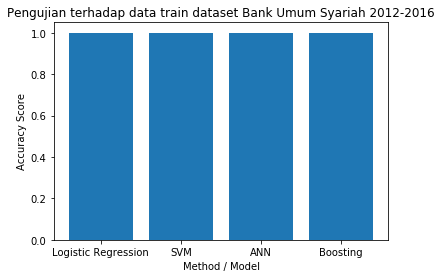

In [184]:
#Menampilkan grafik perbadingan score accuracy yang dihasilkan dari masing masing metode yang digunakan
accuracytraining = [logregclf1216.score(X_train, y_train), svmclf1216.score(X_train, y_train), annclf1216.score(X_train, y_train), boostclf1216.score(X_train, y_train)]
bars = ('Logistic Regression', 'SVM', 'ANN', 'Boosting')
y_pos = np.arange(len(bars))
 

# Menambahkan grafik batang
plt.bar(y_pos, accuracytraining)

# Menambahkan judul pada grafik
plt.title('Pengujian terhadap data train dataset Bank Umum Syariah 2012-2016')

# Menambahkan label pada grafik
plt.xlabel('Method / Model')
plt.ylabel('Accuracy Score')
 
# Menambahkan label untuk x axis dari variabel yang telah ditentukan
plt.xticks(y_pos, bars)
 
# Menampilkan grafik
plt.show()



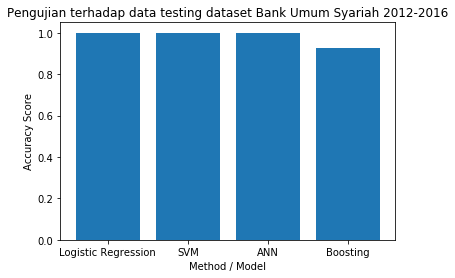

In [186]:
#Menampilkan grafik perbadingan score accuracy yang dihasilkan dari masing masing metode yang digunakan

#Variabel untuk plotting pada grafik batang
accuracytesting = [logregclf1216.score(X_test, y_test), svmclf1216.score(X_test, y_test), annclf1216.score(X_test, y_test), boostclf1216.score(X_test, y_test)]
bars = ('Logistic Regression', 'SVM', 'ANN', 'Boosting')
y_pos = np.arange(len(bars))
 

# Menambahkan grafik batang
plt.bar(y_pos, accuracytesting)

# Menambahkan judul pada grafik
plt.title('Pengujian terhadap data testing dataset Bank Umum Syariah 2012-2016')

# Menambahkan label pada grafik
plt.xlabel('Method / Model')
plt.ylabel('Accuracy Score')
 
# Menambahkan label untuk x axis dari variabel yang telah ditentukan
plt.xticks(y_pos, bars)
 
# Menampilkan grafik
plt.show()


In [23]:
# Import Datasets Consumer Goods/Barang Konsumen di Indonesia tahun (2013-2017)
bk1317 = pd.read_csv('datasets/barangkonsumen1317.csv')

# Memilih fitur yang akan digunakan dimana X adalah nilai dari kolom X1 sampai Z-Score , 
# dan Y adalah data target dari class.
feature_cols2 = ['X1','X2','X3','X4','X5','Z-Score']
Xbk1317 = bk1317[feature_cols2]
ybk1317 = bk1317.Class
# Menampilkan datasets
bk1317.head(10)

,NO.,Bank,X1,X2,X3,X4,X5,Z-Score,Class
0,1,"PT. Kalbe Farma,Tbk",0.5148,0.938,0.726,1.806,1.40860,5.39,Healthy
1,2,"PT. Mayora Indah,Tbk",0.4692,0.490,0.429,0.408,1.22880,3.02,Healthy
2,3,"PT. Merek,Tbk",0.7572,0.938,1.089,1.662,1.70830,6.15,Healthy
3,4,"PT. Sekar Bumi,Tbk",0.1620,0.210,0.495,0.402,2.59740,3.87,Healthy
4,5,"PT. Pyridam Farma,Tbk",0.1788,0.294,0.132,0.690,1.08890,2.38,GreyArea
5,6,"PT. Siantar Top, Tbk",0.0580,0.518,0.297,0.534,1.14890,2.57,GreyArea
6,7,"PT. Sekar Laut,Tbk",0.1164,0.224,0.165,0.516,1.86810,2.89,GreyArea
7,1,"PT. Kalbe Farma,Tbk",0.5532,0.994,0.726,2.184,1.38861,5.85,Healthy
8,2,"PT. Mayora Indah,Tbk",0.3948,0.476,0.165,0.390,1.36863,2.79,GreyArea
9,3,"PT. Merek,Tbk",0.7848,0.980,0.924,1.956,1.20879,5.85,Healthy


In [24]:
# Membagi dataset kedalam training set dan test set
Xbk1317_train, Xbk1317_test, ybk1317_train, ybk1317_test = train_test_split (Xbk1317, ybk1317, test_size=0.30, random_state=0)

In [25]:
#Menjalankan Logistic Regression
logregbk1317 = LogisticRegression(random_state=42)
logregbk1317.fit(Xbk1317_train, ybk1317_train)
logregbk1317_y_pred = logregbk1317.predict(Xbk1317_test)

In [26]:
# Menscore hasil dari Logistic Regression
logregbk1317.score(Xbk1317_train, ybk1317_train), logregbk1317.score(Xbk1317_test, ybk1317_test)

(0.7916666666666666, 0.9090909090909091)

In [27]:
# Menampilkan akurasi dan confusion matrix dari Logistic Regression
conf_matrix_logregbk1317 = confusion_matrix(ybk1317_test, logregbk1317_y_pred)
logregbk1317_accuracy = accuracy_score(ybk1317_test, logregbk1317_y_pred)
print(conf_matrix_logregbk1317, "Accuracy: " , logregbk1317_accuracy*100)

[[ 0  1]
 [ 0 10]] Accuracy:  90.9090909090909


In [28]:
print(classification_report(ybk1317_test, logregbk1317_y_pred))

              precision    recall  f1-score   support

    GreyArea       0.00      0.00      0.00         1
     Healthy       0.91      1.00      0.95        10

    accuracy                           0.91        11
   macro avg       0.45      0.50      0.48        11
weighted avg       0.83      0.91      0.87        11



In [29]:
#Menjalankan based Learn Support Vector Machine
svmbk1317 = SVC(gamma="auto", random_state=123)
svmbk1317.fit(Xbk1317_train, ybk1317_train)
svmbk1317_y_pred = svmbk1317.predict(Xbk1317_test)

In [30]:
# Menscore hasil dari Support Vector Machine
svmbk1317.score(Xbk1317_train, ybk1317_train), svmbk1317.score(Xbk1317_test, ybk1317_test)

(0.9583333333333334, 1.0)

In [31]:
# Menampilkan akurasi dan confusion matrix dari Support Vector Machine
conf_matrix_svmbk1317 = confusion_matrix(ybk1317_test, svmbk1317_y_pred)
svmbk1317_accuracy = accuracy_score(ybk1317_test, svmbk1317_y_pred)
print(conf_matrix_svmbk1317, "Accuracy: " , svmbk1317_accuracy*100)

[[ 1  0]
 [ 0 10]] Accuracy:  100.0


In [32]:
print(classification_report(ybk1317_test, svmbk1317_y_pred))

              precision    recall  f1-score   support

    GreyArea       1.00      1.00      1.00         1
     Healthy       1.00      1.00      1.00        10

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11



In [188]:
#Menjalankan based learn Artificial Neural Network
annbk1317 = MLPClassifier(hidden_layer_sizes=(6, 3), max_iter=500)
annbk1317.fit(Xbk1317_train, ybk1317_train)
annbk1317_y_pred = annbk1317.predict(Xbk1317_test)

In [189]:
# Menscore hasil dari Artificial Neural Network
annbk1317.score(Xbk1317_train, ybk1317_train), annbk1317.score(Xbk1317_test, ybk1317_test)

(0.7916666666666666, 0.9090909090909091)

In [35]:
# Menampilkan akurasi dan confusion matrix dari Artificial Neural Network
conf_matrix_annbk1317 = confusion_matrix(ybk1317_test, annbk1317_y_pred)
annbk1317_accuracy = accuracy_score(ybk1317_test, annbk1317_y_pred)
print(conf_matrix_annbk1317, "Accuracy: " , annbk1317_accuracy*100)

[[ 0  1]
 [ 0 10]] Accuracy:  90.9090909090909


In [36]:
print(classification_report(ybk1317_test, annbk1317_y_pred))

              precision    recall  f1-score   support

    GreyArea       0.00      0.00      0.00         1
     Healthy       0.91      1.00      0.95        10

    accuracy                           0.91        11
   macro avg       0.45      0.50      0.48        11
weighted avg       0.83      0.91      0.87        11



In [37]:
#Menjalankan Ensemble Boosting
boostbk1317 = AdaBoostClassifier(n_estimators=100, random_state=42)
boostbk1317.fit(Xbk1317_train, ybk1317_train)
boostbk1317_y_pred = boostbk1317.predict(Xbk1317_test)

In [38]:
# Menscore hasil dari Ensemble Boosting
boostbk1317.score(Xbk1317_train, ybk1317_train), boostbk1317.score(Xbk1317_test, ybk1317_test)

(1.0, 1.0)

In [39]:
# Menampilkan akurasi dan confusion matrix dari Ensemble Boosting
conf_matrix_boostbk1317 = confusion_matrix(ybk1317_test, boostbk1317_y_pred)
boostbk1317_accuracy = accuracy_score(ybk1317_test, boostbk1317_y_pred)
print(conf_matrix_boostbk1317, "Accuracy: " , boostbk1317_accuracy*100)

[[ 1  0]
 [ 0 10]] Accuracy:  100.0


In [40]:
print(classification_report(ybk1317_test, boostbk1317_y_pred))

              precision    recall  f1-score   support

    GreyArea       1.00      1.00      1.00         1
     Healthy       1.00      1.00      1.00        10

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11



In [41]:
# Melakukan voting untuk melihat score terbaik dari model yang dibangun
votingbk1317 = VotingClassifier(estimators=[('logregbk1317', logregbk1317), ('svmbk1317', svmbk1317), ('annbk1317', annbk1317), ('boostbk1317', boostbk1317)], voting='hard')
votingbk1317.fit(Xbk1317_train, ybk1317_train)
votingbk1317_pred = votingbk1317.predict(Xbk1317_test)
# Menscore hasil dari Voting Classifier
votingbk1317.score(Xbk1317_train, ybk1317_train), votingbk1317.score(Xbk1317_test, ybk1317_test)

(0.9583333333333334, 1.0)

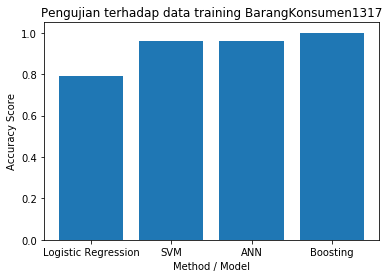

In [187]:
#Menampilkan grafik perbadingan score accuracy yang dihasilkan dari masing masing metode yang digunakan untuk dataset barangkonsumen1317

#Variabel untuk plotting pada grafik batang
accuracytrainbk1317 = [logregbk1317.score(Xbk1317_train, ybk1317_train), svmbk1317.score(Xbk1317_train, ybk1317_train), annbk1317.score(Xbk1317_train, ybk1317_train), boostbk1317.score(Xbk1317_train, ybk1317_train)]
bars_bk1317 = ('Logistic Regression', 'SVM', 'ANN', 'Boosting')
y_posbk1317 = np.arange(len(bars_bk1317))
 

# Menambahkan grafik batang
plt.bar(y_posbk1317, accuracytrainbk1317)

# Menambahkan judul pada grafik
plt.title('Pengujian terhadap data training BarangKonsumen1317')

# Menambahkan label pada grafik
plt.xlabel('Method / Model')
plt.ylabel('Accuracy Score')
 
# Menambahkan label untuk x axis dari variabel yang telah ditentukan
plt.xticks(y_posbk1317, bars_bk1317)
 
# Menampilkan grafik
plt.show()

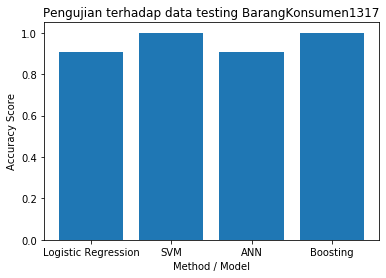

In [43]:
#Menampilkan grafik perbadingan score accuracy yang dihasilkan dari masing masing metode yang digunakan untuk dataset barangkonsumen1317

#Variabel untuk plotting pada grafik batang
accuracytestbk1317 = [logregbk1317.score(Xbk1317_test, ybk1317_test), svmbk1317.score(Xbk1317_test, ybk1317_test), annbk1317.score(Xbk1317_test, ybk1317_test), boostbk1317.score(Xbk1317_test, ybk1317_test)]
bars_bk1317 = ('Logistic Regression', 'SVM', 'ANN', 'Boosting')
y_posbk1317 = np.arange(len(bars_bk1317))
 

# Menambahkan grafik batang
plt.bar(y_posbk1317, accuracytestbk1317)

# Menambahkan judul pada grafik
plt.title('Pengujian terhadap data testing BarangKonsumen1317')

# Menambahkan label pada grafik
plt.xlabel('Method / Model')
plt.ylabel('Accuracy Score')
 
# Menambahkan label untuk x axis dari variabel yang telah ditentukan
plt.xticks(y_posbk1317, bars_bk1317)
 
# Menampilkan grafik
plt.show()

In [44]:
#Melakukan cross validation untuk memvalidasi score yang dihasilkan dari model yang dibangun
from sklearn import model_selection
print('10 fold cross Validation:\n')

for clf_logregbk1317, label in zip([logregbk1317], 
                      ['Logistic Regression']):

    scores_logregbk1317 = model_selection.cross_val_score(clf_logregbk1317, Xbk1317, ybk1317, cv=10, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores_logregbk1317.mean(), scores_logregbk1317.std(), label))

10 fold cross Validation:

Accuracy: 0.85 (+/- 0.12) [Logistic Regression]


In [45]:
#Melakukan cross validation untuk memvalidasi score yang dihasilkan dari model yang dibangun
from sklearn import model_selection
print('10 fold cross Validation:\n')

for clf_svmbk1317, label in zip([svmbk1317], 
                      ['Support Vector Machine']):

    scores_svmbk1317 = model_selection.cross_val_score(clf_svmbk1317, Xbk1317, ybk1317, cv=10, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores_svmbk1317.mean(), scores_svmbk1317.std(), label))

10 fold cross Validation:

Accuracy: 0.97 (+/- 0.07) [Support Vector Machine]


In [50]:
#Melakukan cross validation untuk memvalidasi score yang dihasilkan dari model yang dibangun
from sklearn import model_selection
print('10 fold cross Validation:\n')

for clf_annbk1317, label in zip([annbk1317], 
                      ['Artificial Neural Network']):

    scores_annbk1317 = model_selection.cross_val_score(clf_annbk1317, Xbk1317, ybk1317, cv=10, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores_annbk1317.mean(), scores_annbk1317.std(), label))

10 fold cross Validation:

Accuracy: 0.93 (+/- 0.11) [Artificial Neural Network]


In [47]:
#Melakukan cross validation untuk memvalidasi score yang dihasilkan dari model yang dibangun
from sklearn import model_selection
print('10 fold cross Validation:\n')

for clf_boostbk1317, label in zip([boostbk1317], 
                      ['Boosting']):

    scores_boostbk1317 = model_selection.cross_val_score(clf_boostbk1317, Xbk1317, ybk1317, cv=10, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores_boostbk1317.mean(), scores_boostbk1317.std(), label))

10 fold cross Validation:

Accuracy: 0.97 (+/- 0.07) [Boosting]


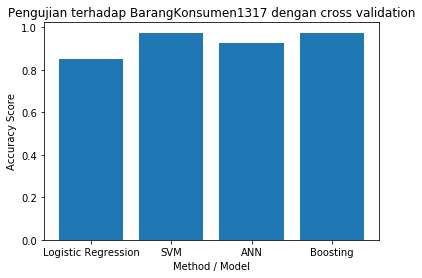

In [51]:
#Menampilkan grafik perbadingan score accuracy yang dihasilkan dari model berdasarkan cross validation
#pada datasetbarangkonsumen1317
#Variabel untuk plotting pada grafik batang
accuracyvalidationbk1317 = [scores_logregbk1317.mean(), scores_svmbk1317.mean(), scores_annbk1317.mean(), scores_boostbk1317.mean()]
bars_bk1317 = ('Logistic Regression', 'SVM', 'ANN', 'Boosting')
y_posbk1317 = np.arange(len(bars_bk1317))
 

# Menambahkan grafik batang
plt.bar(y_posbk1317, accuracyvalidationbk1317)

# Menambahkan judul pada grafik
plt.title('Pengujian terhadap BarangKonsumen1317 dengan cross validation')

# Menambahkan label pada grafik
plt.xlabel('Method / Model')
plt.ylabel('Accuracy Score')
 
# Menambahkan label untuk x axis dari variabel yang telah ditentukan
plt.xticks(y_posbk1317, bars_bk1317)
 
# Menampilkan grafik
plt.show()

In [52]:
# Import Datasets Consumer Goods/Barang Konsumen di Indonesia tahun (2013-2017)
datawine = pd.read_csv('datasets/klasifikasiwine.csv')

# Memilih fitur yang akan digunakan dimana X adalah nilai dari kolom X1 sampai Z-Score , 
# dan Y adalah data target dari class.
feature_cols2 = ['X1','X2','X3','X4','X5','Z-Score']
Xwine = datawine.iloc[:, 0:10].values
ywine = datawine.iloc[:, 11].values
# Menampilkan datasets
datawine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,bad
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,bad
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,good
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,good
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,bad


In [110]:
# Membagi dataset kedalam training set dan test set
Xwine_train, Xwine_test, ywine_train, ywine_test = train_test_split (Xwine, ywine, test_size=0.10, random_state=1)

In [111]:
#Menjalankan Logistic Regression
logregwine = LogisticRegression()
logregwine.fit(Xwine_train, ywine_train)
logregwine_y_pred = logregwine.predict(Xwine_test)

In [112]:
# Menscore hasil dari Logistic Regression
logregwine.score(Xwine_train, ywine_train), logregwine.score(Xwine_test, ywine_test)

(0.6963168867268936, 0.76875)

In [113]:
# Menampilkan akurasi dan confusion matrix dari Logistic Regression
conf_matrix_logregwine = confusion_matrix(ywine_test, logregwine_y_pred)
logregwine_accuracy = accuracy_score(ywine_test, logregwine_y_pred)
print(conf_matrix_logregwine, "Accuracy: " , logregwine_accuracy*100)

[[48 24]
 [13 75]] Accuracy:  76.875


In [114]:
print(classification_report(ywine_test, logregwine_y_pred))

              precision    recall  f1-score   support

         bad       0.79      0.67      0.72        72
        good       0.76      0.85      0.80        88

    accuracy                           0.77       160
   macro avg       0.77      0.76      0.76       160
weighted avg       0.77      0.77      0.77       160



In [120]:
#Menjalankan based Learn Support Vector Machine
svmwine = SVC(gamma="auto", random_state=123)
svmwine.fit(Xwine_train, ywine_train)
svmwine_y_pred = svmwine.predict(Xwine_test)

In [121]:
# Menscore hasil dari Support Vector Machine
svmwine.score(Xwine_train, ywine_train), svmwine.score(Xwine_test, ywine_test)

(0.8151494093120223, 0.65)

In [122]:
# Menampilkan akurasi dan confusion matrix dari Support Vector Machine
conf_matrix_svmwine = confusion_matrix(ywine_test, svmwine_y_pred)
svmwine_accuracy = accuracy_score(ywine_test, svmwine_y_pred)
print(conf_matrix_svmwine, "Accuracy: " , svmwine_accuracy*100)

[[46 26]
 [30 58]] Accuracy:  65.0


In [123]:
print(classification_report(ywine_test, svmwine_y_pred))

              precision    recall  f1-score   support

         bad       0.61      0.64      0.62        72
        good       0.69      0.66      0.67        88

    accuracy                           0.65       160
   macro avg       0.65      0.65      0.65       160
weighted avg       0.65      0.65      0.65       160



In [140]:
#Menjalankan based learn Artificial Neural Network
annwine = MLPClassifier(hidden_layer_sizes=(10, 8, 6, 4), max_iter=1000)
annwine.fit(Xwine_train, ywine_train)
annwine_y_pred = annwine.predict(Xwine_test)

In [141]:
# Menscore hasil dari Artificial Neural Network
annwine.score(Xwine_train, ywine_train), annwine.score(Xwine_test, ywine_test)

(0.6838082001389854, 0.73125)

In [143]:
# Menampilkan akurasi dan confusion matrix dari Artificial Neural Network
conf_matrix_annwine = confusion_matrix(ywine_test, annwine_y_pred)
annwine_accuracy = accuracy_score(ywine_test, annwine_y_pred)
print(conf_matrix_annwine, "Accuracy: " , annwine_accuracy*100)

[[46 26]
 [17 71]] Accuracy:  73.125


In [144]:
print(classification_report(ywine_test, annwine_y_pred))

              precision    recall  f1-score   support

         bad       0.73      0.64      0.68        72
        good       0.73      0.81      0.77        88

    accuracy                           0.73       160
   macro avg       0.73      0.72      0.72       160
weighted avg       0.73      0.73      0.73       160



In [145]:
#Menjalankan Ensemble Boosting
boostwine = AdaBoostClassifier(n_estimators=100, random_state=42)
boostwine.fit(Xwine_train, ywine_train)
boostwine_y_pred = boostwine.predict(Xwine_test)

In [146]:
# Menscore hasil dari Ensemble Boosting
boostwine.score(Xwine_train, ywine_train), boostwine.score(Xwine_test, ywine_test)

(0.7894371091035441, 0.8125)

In [147]:
# Menampilkan akurasi dan confusion matrix dari Ensemble Boosting
conf_matrix_boostwine = confusion_matrix(ywine_test, boostwine_y_pred)
boostwine_accuracy = accuracy_score(ywine_test, boostwine_y_pred)
print(conf_matrix_boostwine, "Accuracy: " , boostwine_accuracy*100)

[[53 19]
 [11 77]] Accuracy:  81.25


In [148]:
print(classification_report(ywine_test, boostwine_y_pred))

              precision    recall  f1-score   support

         bad       0.83      0.74      0.78        72
        good       0.80      0.88      0.84        88

    accuracy                           0.81       160
   macro avg       0.82      0.81      0.81       160
weighted avg       0.81      0.81      0.81       160



In [154]:
# Melakukan voting untuk melihat score terbaik dari model yang dibangun
votingwine = VotingClassifier(estimators=[('logregwine', logregwine), ('svmwine', svmwine), ('annwine', annwine), ('boostwine', boostwine)], voting='hard')
votingwine.fit(Xwine_train, ywine_train)
votingwine_pred = votingwine.predict(Xwine_test)
# Menscore hasil dari Voting Classifier
votingwine.score(Xwine_train, ywine_train), votingwine.score(Xwine_test, ywine_test)

(0.7658095899930507, 0.7875)

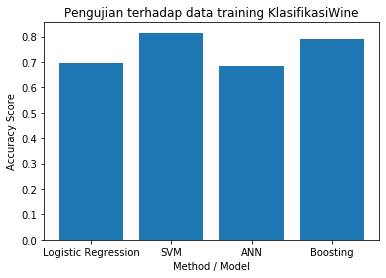

In [158]:
#Menampilkan grafik perbadingan score accuracy yang dihasilkan dari masing masing metode yang digunakan untuk dataset klasifikasiwine
#Variabel untuk plotting pada grafik batang
accuracytrainwine = [logregwine.score(Xwine_train, ywine_train), svmwine.score(Xwine_train, ywine_train), annwine.score(Xwine_train, ywine_train), boostwine.score(Xwine_train, ywine_train)]
bars_wine = ('Logistic Regression', 'SVM', 'ANN', 'Boosting')
y_wine = np.arange(len(bars_wine))
 

# Menambahkan grafik batang
plt.bar(y_wine, accuracytrainwine)

# Menambahkan judul pada grafik
plt.title('Pengujian terhadap data training KlasifikasiWine')

# Menambahkan label pada grafik
plt.xlabel('Method / Model')
plt.ylabel('Accuracy Score')
 
# Menambahkan label untuk x axis dari variabel yang telah ditentukan
plt.xticks(y_wine, bars_wine)
 
# Menampilkan grafik
plt.show()

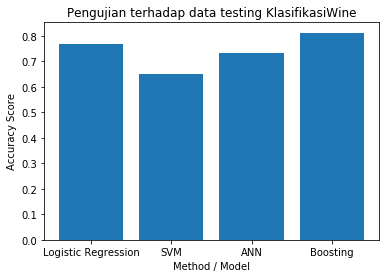

In [157]:
#Menampilkan grafik perbadingan score accuracy yang dihasilkan dari masing masing metode yang digunakan untuk dataset klasifikasiwine
#Variabel untuk plotting pada grafik batang
accuracytestwine = [logregwine.score(Xwine_test, ywine_test), svmwine.score(Xwine_test, ywine_test), annwine.score(Xwine_test, ywine_test), boostwine.score(Xwine_test, ywine_test)]
bars_wine = ('Logistic Regression', 'SVM', 'ANN', 'Boosting')
y_wine = np.arange(len(bars_wine))
 

# Menambahkan grafik batang
plt.bar(y_wine, accuracytestwine)

# Menambahkan judul pada grafik
plt.title('Pengujian terhadap data testing KlasifikasiWine')

# Menambahkan label pada grafik
plt.xlabel('Method / Model')
plt.ylabel('Accuracy Score')
 
# Menambahkan label untuk x axis dari variabel yang telah ditentukan
plt.xticks(y_wine, bars_wine)
 
# Menampilkan grafik
plt.show()

In [160]:
#Melakukan cross validation untuk memvalidasi score yang dihasilkan dari model yang dibangun
from sklearn import model_selection
print('10 fold cross Validation:\n')

for clf_logregwine, label in zip([logregwine], 
                      ['Logistic Regression']):

    scores_logregwine = model_selection.cross_val_score(clf_logregwine, Xwine, ywine, cv=10, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores_logregwine.mean(), scores_logregwine.std(), label))

10 fold cross Validation:

Accuracy: 0.69 (+/- 0.06) [Logistic Regression]


In [161]:
#Melakukan cross validation untuk memvalidasi score yang dihasilkan dari model yang dibangun
from sklearn import model_selection
print('10 fold cross Validation:\n')

for clf_svmwine, label in zip([svmwine], 
                      ['Support Vector Machine']):

    scores_svmwine = model_selection.cross_val_score(clf_svmwine, Xwine, ywine, cv=10, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores_svmwine.mean(), scores_svmwine.std(), label))

10 fold cross Validation:

Accuracy: 0.60 (+/- 0.06) [Support Vector Machine]


In [162]:
#Melakukan cross validation untuk memvalidasi score yang dihasilkan dari model yang dibangun
from sklearn import model_selection
print('10 fold cross Validation:\n')

for clf_annwine, label in zip([annwine], 
                      ['Artificial Neural Network']):

    scores_annwine = model_selection.cross_val_score(clf_annwine, Xwine, ywine, cv=10, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores_annwine.mean(), scores_annwine.std(), label))

10 fold cross Validation:

Accuracy: 0.64 (+/- 0.07) [Artificial Neural Network]


In [163]:
#Melakukan cross validation untuk memvalidasi score yang dihasilkan dari model yang dibangun
from sklearn import model_selection
print('10 fold cross Validation:\n')

for clf_boostwine, label in zip([boostwine], 
                      ['Boosting']):

    scores_boostwine = model_selection.cross_val_score(clf_boostwine, Xwine, ywine, cv=10, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores_boostwine.mean(), scores_boostwine.std(), label))

10 fold cross Validation:

Accuracy: 0.69 (+/- 0.06) [Boosting]


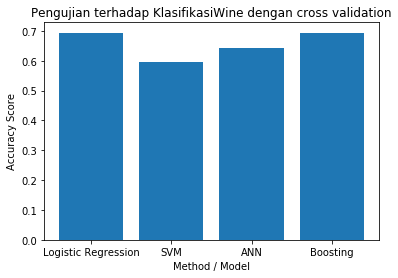

In [164]:
#Menampilkan grafik perbadingan score accuracy yang dihasilkan dari model berdasarkan cross validation
#pada dataset klasifikasiwine
#Variabel untuk plotting pada grafik batang
accuracyvalidationwine = [scores_logregwine.mean(), scores_svmwine.mean(), scores_annwine.mean(), scores_boostwine.mean()]
bars_wine = ('Logistic Regression', 'SVM', 'ANN', 'Boosting')
y_wine = np.arange(len(bars_wine))
 

# Menambahkan grafik batang
plt.bar(y_wine, accuracyvalidationwine)

# Menambahkan judul pada grafik
plt.title('Pengujian terhadap KlasifikasiWine dengan cross validation')

# Menambahkan label pada grafik
plt.xlabel('Method / Model')
plt.ylabel('Accuracy Score')
 
# Menambahkan label untuk x axis dari variabel yang telah ditentukan
plt.xticks(y_wine, bars_wine)
 
# Menampilkan grafik
plt.show()